In [1]:
import numpy as np
import os
from skimage.feature import hog
import joblib
import cv2
from google.colab.patches import cv2_imshow
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
import pandas as pd
from google.colab import userdata

os.environ['KAGGLE_KEY'] = userdata.get('KAGGLE_KEY')
os.environ['KAGGLE_USERNAME'] = userdata.get('KAGGLE_USERNAME')

ModuleNotFoundError: No module named 'seaborn'

In [ ]:
!kaggle datasets download -d caasperart/haarcascadeplatenumber --unzip --path '/content/dataset'

Dataset URL: https://www.kaggle.com/datasets/caasperart/haarcascadeplatenumber
License(s): unknown
 99% 1.04G/1.04G [00:12<00:00, 87.5MB/s]
100% 1.04G/1.04G [00:12<00:00, 90.5MB/s]


In [ ]:
len(os.listdir('/content/dataset/DatasetCharacter/DatasetCharacter/0'))
len(os.listdir('/content/dataset/DatasetCharacter/DatasetCharacter/1'))

1090

In [ ]:
train_dir = r'/content/dataset/DatasetCharacter/DatasetCharacter/'
labels_list = [i for i in os.listdir(train_dir)]
pathimg = [os.listdir(train_dir + i) for i in labels_list]

In [ ]:
features = []
labels = []
for i,j in enumerate(zip(pathimg,labels_list)):
  imgs,label = j
  for img in imgs:
      img = cv2.imread(train_dir+label+'/'+img)
      img_res=cv2.resize(img,(64,128),interpolation=cv2.INTER_AREA)
      img_gray= cv2.cvtColor(img_res,cv2.COLOR_BGR2GRAY)
      hog_img= hog(img_gray,orientations=9,pixels_per_cell=(8,8), cells_per_block=(1, 1))
      features.append(hog_img)
      labels.append(label)

In [ ]:
print(len(pd.DataFrame(np.array(features))))
print(len(pd.DataFrame(np.array(labels))))

37234
37234


In [ ]:
df = pd.DataFrame(np.array(features))
df['target'] = labels
df

,0,1,2,3,4,5,6,7,8,9,...,1143,1144,1145,1146,1147,1148,1149,1150,1151,target
0,0.704350,0.012921,0.032687,0.012921,0.057783,0.042097,0.024515,0.025841,0.704350,0.550318,...,0.475477,0.475477,0.475477,0.228841,0.475477,0.0,0.002525,0.00000,0.208114,H
1,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.00000,0.000000,H
2,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.00000,0.000000,H
3,0.487987,0.217886,0.487987,0.000000,0.487987,0.000000,0.487987,0.000000,0.000000,0.365905,...,0.000000,0.000000,0.000000,0.000000,1.000000,0.0,0.000000,0.00000,0.000000,H
4,0.639163,0.192828,0.495363,0.239174,0.481329,0.000000,0.075634,0.119587,0.000000,0.976232,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.00000,0.000000,H
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
37229,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.00000,0.000000,6
37230,0.432478,0.403080,0.361991,0.174779,0.432478,0.298367,0.196181,0.087390,0.408313,0.467831,...,0.484661,0.457552,0.480640,0.126660,0.484661,0.0,0.240320,0.12666,0.000000,6
37231,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.00000,0.000000,6
37232,0.485995,0.166187,0.485995,0.166187,0.485995,0.000000,0.485995,0.000000,0.000000,0.385525,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.00000,0.000000,6


In [ ]:
df['target'].unique()

array(['H', 'T', 'Y', 'L', 'B', 'M', 'W', 'U', 'G', '7', '5', 'X', 'A',
       '3', 'J', 'C', 'F', '8', 'P', 'D', '4', 'O', 'R', '0', 'I', 'Q',
       'Z', 'V', 'K', 'N', '9', '2', 'S', '1', 'E', '6'], dtype=object)

<Axes: xlabel='target', ylabel='count'>

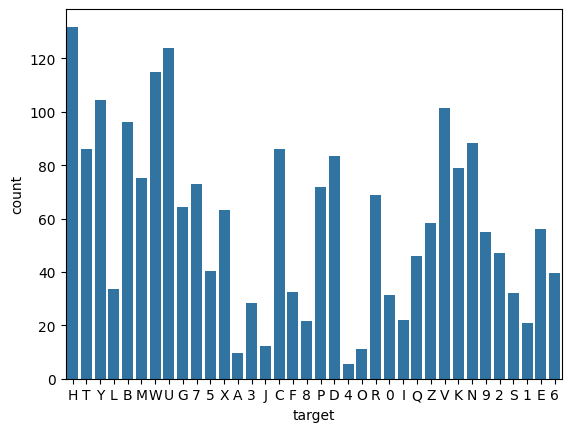

In [ ]:
sns.countplot(x='target', data=df)

In [ ]:
x = np.array(df.iloc[:,:-1])
y = np.array(df['target'])

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y,
                                                    test_size=0.20,
                                                    random_state=42)

In [ ]:
from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state=0)
sm_x,sm_y=sm.fit_resample(x_train, y_train)

<Axes: xlabel='target', ylabel='count'>

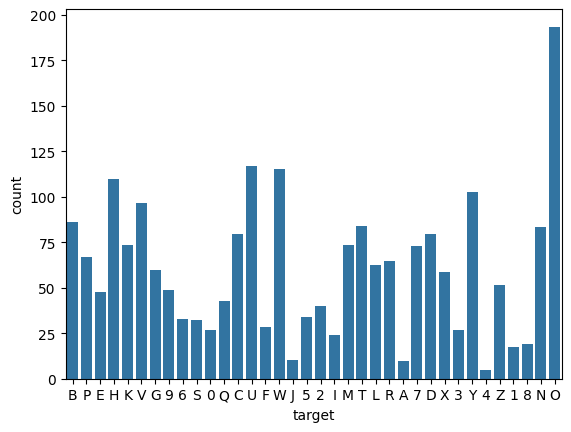

In [ ]:
bal_df = pd.DataFrame(sm_x)
bal_df['target']=pd.DataFrame(sm_y)
sns.countplot(x='target', data=bal_df)

In [ ]:
bal_df['target'].value_counts()

,count
target,
B,986
P,986
M,986
T,986
L,986
R,986
A,986
7,986
D,986


In [ ]:
lreg = LogisticRegression()
clf=lreg.fit(sm_x, sm_y)
y_pred = clf.predict(x_test)
print('Accuracy {:.2f}'.format(clf.score(x_test, y_test)))

from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Accuracy 0.92
              precision    recall  f1-score   support

           0       0.94      0.95      0.95       230
           1       0.89      0.87      0.88       227
           2       0.96      0.94      0.95       246
           3       0.93      0.95      0.94       210
           4       0.96      0.91      0.93       220
           5       0.94      0.96      0.95       230
           6       0.94      0.91      0.93       223
           7       0.96      0.93      0.95       184
           8       0.96      0.95      0.95       223
           9       0.94      0.93      0.94       228
           A       0.89      0.90      0.90       220
           B       0.96      0.90      0.93       225
           C       0.88      0.90      0.89       214
           D       0.90      0.94      0.92       192
           E       0.91      0.92      0.92       210
           F       0.90      0.93      0.91       195
           G       0.91      0.91      0.91       222
           H 

In [ ]:
joblib.dump(clf, r'hog_lreg_model_3.pkl')

['hog_lreg_model_3.pkl']

In [ ]:
clf = joblib.load("hog_lreg_model_3.pkl")

# Read the input image
def ocr(PATH):
  im = cv2.imread(PATH)

  # Convert to grayscale
  im_gray = cv2.cvtColor(im, cv2.COLOR_BGR2GRAY)

  # Threshold the image in order to find contours
  ret, im_th = cv2.threshold(im_gray, 120, 255, cv2.THRESH_BINARY+cv2.THRESH_OTSU)

  # Find contours in the image
  ctrs,hier = cv2.findContours(im_th, cv2.RETR_TREE,
                                  cv2.CHAIN_APPROX_SIMPLE)

  bboxes=[cv2.boundingRect(c) for c in ctrs]
  sorted_bboxes = sorted(bboxes,key=lambda b:b[0])

  # For each rectangular region, calculate HOG features and predict
  # the digit using our logistic regression model.
  plate_char=[]
  for num,i_bboxes in enumerate(sorted_bboxes):
      [x,y,w,h]=i_bboxes
      if h>100 and w < 100:
      # Make the rectangular region around the digit
          cv2.rectangle(im,(x,y),(x+w,y+h),(0,255,0),1)
          roi=im_gray[y:y+h,x:x+w]
          # Resize the image
          roi = cv2.resize(roi, (64, 128), interpolation=cv2.INTER_AREA)
          # Calculate the HOG features
          # use the same parameters used for training
          roi_hog_fd = hog(roi, orientations=9, pixels_per_cell=(8, 8),
                          cells_per_block=(1, 1))
          nbr = clf.predict(np.array([roi_hog_fd]))

          cv2.putText(im, str((nbr[0])), (x,y+h),cv2.FONT_HERSHEY_SIMPLEX,
                      2, (0, 200, 250), 3)
          plate_char.append(str(nbr[0]))

  print('result: '.join(plate_char))

  cv2_imshow(im)

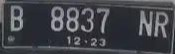

In [ ]:
ocr('/content/B8837NR.jpg')

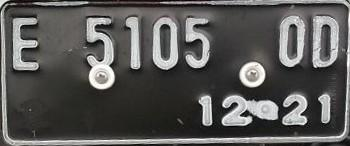

In [ ]:
ocr('/content/E5105OD.jpg')